# Case-by-case analysis
This notebook demonstrates how to visualize which model managed to solve which test-case how often.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
directory = "../data/"

collection = []
for filename in os.listdir(directory):
    if filename.endswith("_results.jsonl"):
        print(filename)
        df = pd.read_json(directory + filename, lines=True)
        df['model'] = filename.replace(".jsonl_results.jsonl", "").replace("samples_", "")
        collection.append(df)

df = pd.concat(collection)

samples_deepseek-coder-v2.jsonl_results.jsonl
samples_deepseek-coder-v2_new.jsonl_results.jsonl
samples_deepseek-coder-v2_old_prompt.jsonl_results.jsonl
samples_gpt-4o-2024-05-13.jsonl_results.jsonl
samples_gpt-4o-2024-05-13_old_prompt.jsonl_results.jsonl
samples_reference.jsonl_results.jsonl
samples_reference_old_prompt.jsonl_results.jsonl


In [3]:
df.head()

,task_id,completion,full_response,result,passed,model
0,../test_cases/apply_otsu_threshold_and_count_p...,\nimport numpy as np\nfrom skimage import filt...,"Sure, here is the complete code with the funct...",failed:,False,deepseek-coder-v2
1,../test_cases/binary_closing.ipynb,\nimport numpy as np\n\ndef binary_closing(bin...,Here's the complete code for the function `bin...,passed,True,deepseek-coder-v2
2,../test_cases/binary_skeleton.ipynb,\nimport numpy as np\nfrom skimage import morp...,"Sure, here's the complete code with comments o...",passed,True,deepseek-coder-v2
3,../test_cases/bland_altman.ipynb,\nimport pandas as pd\nimport numpy as np\nimp...,```python\nimport pandas as pd\nimport numpy a...,passed,True,deepseek-coder-v2
4,../test_cases/combine_columns_of_tables.ipynb,\nimport pandas as pd\n\ndef combine_columns_o...,```python\nimport pandas as pd\n\ndef combine_...,passed,True,deepseek-coder-v2


In [9]:
# Ensure the 'passed' column is boolean for correct processing.
df['passed'] = df['passed'].astype(bool)
# shorten task name
df['task_id'] = [str(t).replace("../test_cases/", "").replace(".ipynb","") for t in df['task_id']]

# Pivot the dataframe to count True 'passed' values for each model-task combination.
pivot_df = df.pivot_table(index='task_id', columns='model', values='passed', aggfunc='mean', fill_value=0)

# Reset the index if 'task_id' needs to be a column instead of an index
pivot_df.reset_index(inplace=True)

# Apply formatting to display only two digits after the decimal point for all columns after the first (task_id column)
pivot_df = pivot_df.round(2)

pivot_df

KeyError: 'passed'

0.12.2


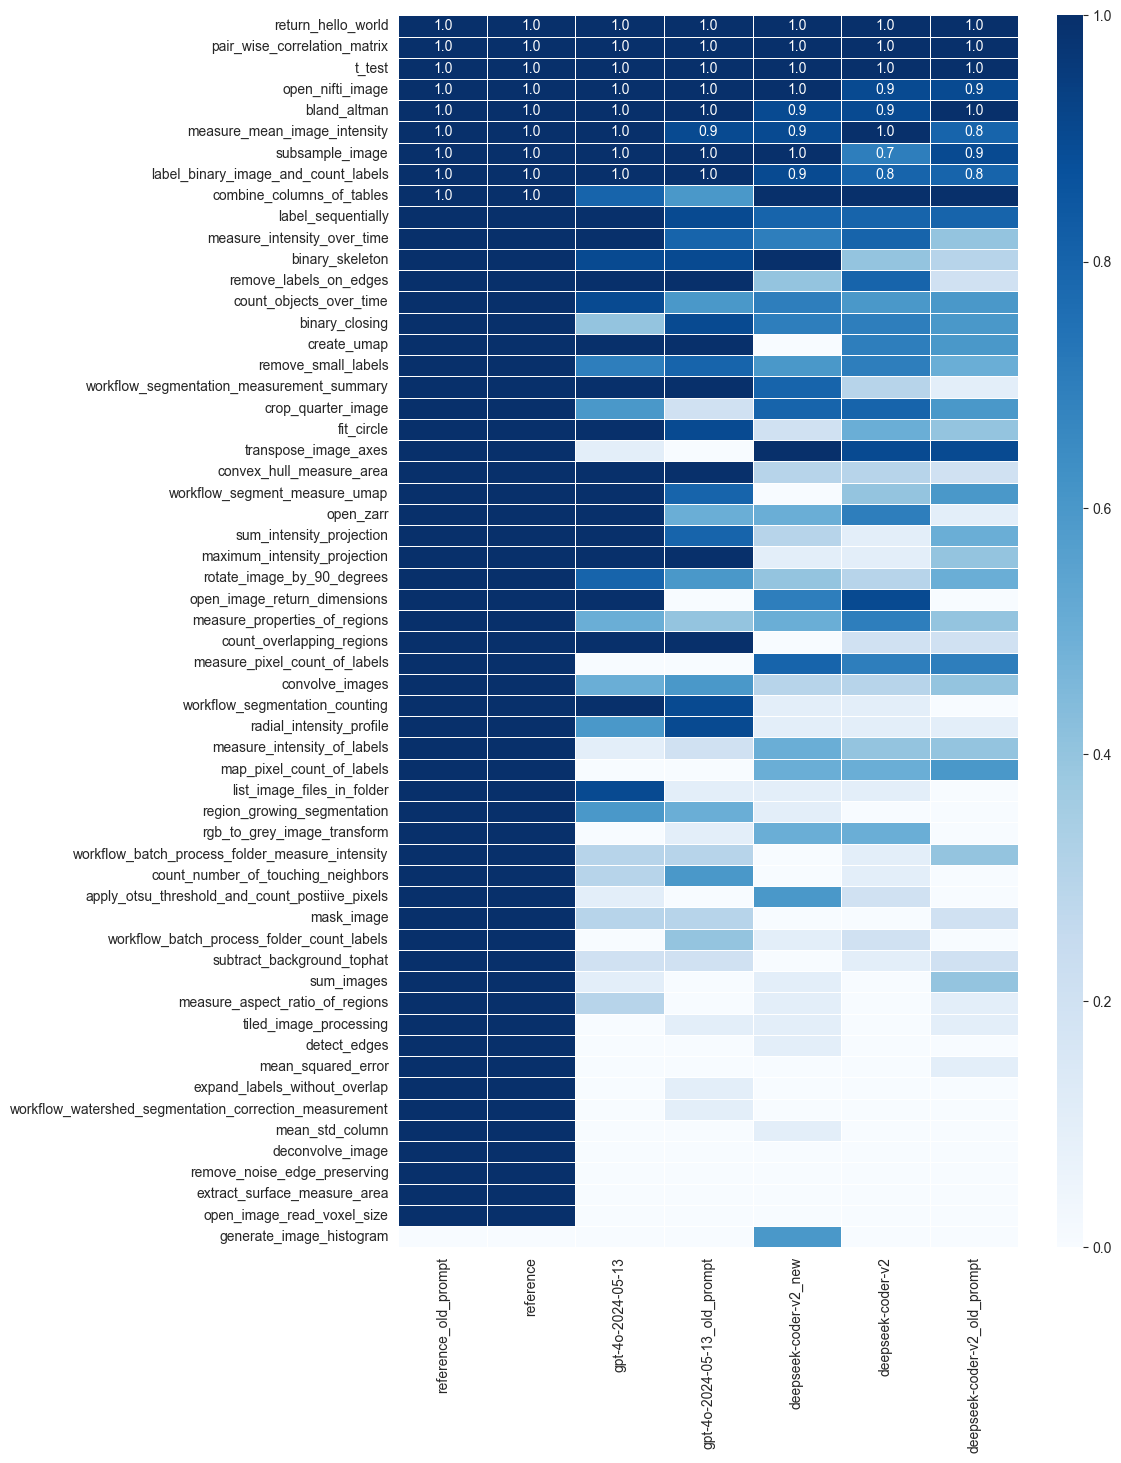

In [5]:
print(sns.__version__)
sns.set_style("white")

df = pivot_df

# Separate the numerical data for plotting and the string column for y-axis labels
numerical_data = df.select_dtypes(include=[np.number])
mean_values = numerical_data.mean().sort_values(ascending=False)

# Reorder columns in numerical_data based on sorted mean values
numerical_data = numerical_data[mean_values.index]

df["average_task_score"] = df.iloc[:,1:-1].mean(axis=1)
str_column_values = df.sort_values(by="average_task_score", ascending=False)['task_id']  # Replace 'str_column' with the actual column name

# Plotting
fig = plt.figure(figsize=(10,16))
numerical_data["average_task_score"] = df.iloc[:,1:-1].mean(axis=1)

sns.heatmap(numerical_data.sort_values("average_task_score",ascending=False).drop(columns=("average_task_score")), annot=True, linewidths=.5, yticklabels=str_column_values, fmt=".1f", cbar_kws={'shrink': 1, 'aspect': 3*16}, cmap="Blues")
plt.gca().set_xlabel('')

#plt.savefig("../docs/paper/performance_per_task", bbox_inches="tight", dpi=300)
plt.show()

In [8]:
#rename columns deepseek-coder-v2_new to deepseek-coder-v2_skimage
pivot_df.rename(columns={"deepseek-coder-v2_new":"deepseek-coder-v2_skimage"}, inplace=True)
pivot_df.describe()


model,deepseek-coder-v2,deepseek-coder-v2_skimage,deepseek-coder-v2_old_prompt,gpt-4o-2024-05-13,gpt-4o-2024-05-13_old_prompt,reference,reference_old_prompt,average_task_score
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.403448,0.413793,0.362069,0.551724,0.500000,0.982759,0.982759,0.535632
std,0.364651,0.376712,0.344800,0.433768,0.412523,0.131306,0.131306,0.270719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,0.025000,0.100000,0.000000,0.025000,0.025000,1.000000,1.000000,0.287500
50%,0.300000,0.350000,0.350000,0.600000,0.550000,1.000000,1.000000,0.575000
75%,0.700000,0.775000,0.600000,1.000000,0.900000,1.000000,1.000000,0.716667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


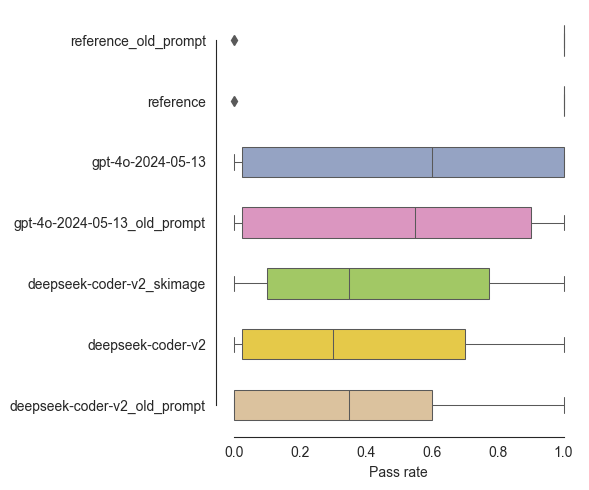

In [10]:
# Assuming pivot_df has 'task_id' as a non-numerical column and the rest are numerical and need to be plotted
numerical_data = pivot_df.drop(columns=['task_id']).drop(columns=("average_task_score"))

# Calculate the mean of each column and sort these means in descending order
mean_values = numerical_data.mean().sort_values(ascending=False)

# Reorder columns in numerical_data based on sorted mean values
ordered_numerical_data = numerical_data[mean_values.index]

# Plotting the boxplot with reordered columns and flipping the axes
plt.figure(figsize=(6, 5))
boxplot = sns.boxplot(data=ordered_numerical_data, palette= "Set2", width=0.5, linewidth=0.75, orient='h')
sns.despine(offset=1, trim=True)

plt.yticks(rotation=0)  # Rotate y-axis labels if needed
plt.xlabel('Pass rate')  # Flip label to x-axis
plt.gca().set_ylabel('')  # Remove y-axis label
plt.tight_layout()  # Adjust layout to make room for the y-axis labels

#plt.savefig("../docs/paper/pass_rate_llms.png", dpi=700)
plt.show()

In [8]:
with open("model_order.txt", 'w') as f:
    for item in ordered_numerical_data.columns:
        f.write(str(item) + '\n')